In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'F:\machine learning\lab 2\dataset Lab\lab13\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [5]:
train_dir = r'F:\machine learning\lab 2\dataset\computer_vision\train'
validation_dir = r'F:\machine learning\lab 2\dataset\computer_vision\validation'
test_dir = r'F:\machine learning\lab 2\dataset\computer_vision\test'

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,088,452 (49.93 MB)

 Trainable params: 13,088,452 (49.93 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [13]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(128, 128),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                        validation_dir,
                                                        target_size=(128, 128),
                                                        batch_size=32,
                                                        class_mode='categor   ical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [17]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [19]:
model_history = model.fit(train_generator,
                         validation_data =validation_generator,
                         steps_per_epoch=train_generator.n//train_generator.batch_size,
                         validation_steps = validation_generator.n//validation_generator.batch_size,
                         epochs = 20,
                         callbacks = callbacks)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.4018 - loss: 1.2627
Epoch 1: val_loss improved from inf to 0.65406, saving model to F:\machine learning\lab 2\dataset Lab\lab13\\E1-cp-0001-loss0.65.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - acc: 0.4043 - loss: 1.2592 - val_acc: 0.7143 - val_loss: 0.6541
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.6937 - loss: 0.6537
Epoch 2: val_loss improved from 0.65406 to 0.52168, saving model to F:\machine learning\lab 2\dataset Lab\lab13\\E1-cp-0002-loss0.52.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - acc: 0.6945 - loss: 0.6525 - val_acc: 0.7143 - val_loss: 0.5217
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.7922 - loss: 0.4765
Epoch 3: val_loss improved from 0.52168 to 0.50937, saving model to F:\machine learning\lab 2\dataset Lab\lab13\\E1-cp-0003-loss0.51.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - acc: 0.7920 - loss: 0.4766 - val_acc: 0.7455 - val_loss: 0.5094
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8171 - loss: 0.4141
Epoch 4: val_loss improved from 0.50937 to 0.49603, saving model to F:\machine learning\lab 2\dataset Lab\lab13\\E1-cp-0004-loss0.50.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - acc: 0.8168 - loss: 0.4145 - val_acc: 0.7812 - val_loss: 0.4960
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8130 - loss: 0.3992
Epoch 5: val_loss improved from 0.49603 to 0.40905, saving model to F:\machine learning\lab 2\dataset Lab\lab13\\E1-cp-0005-loss0.41.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - acc: 0.8130 - loss: 0.3988 - val_acc: 0.7634 - val_loss: 0.4091
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8305 - loss: 0.3605
Epoch 6: val_loss did not improve from 0.40905
50/50 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - acc: 0.8307 - loss: 0.3603 - val_acc: 0.7679 - val_loss: 0.4415
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8462 - loss: 0.3187
Epoch 7: val_loss improved from 0.40905 to 0.31304, saving model to F:\machine learning\lab 2\dataset Lab\lab13\\E1-cp-0007-loss0.31.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - acc: 0.8462 - loss: 0.3187 - val_acc: 0.8438 - val_loss: 0.3130
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8828 - loss: 0.2743
Epoch 8: val_loss improved from 0.31304 to 0.27801, saving model to F:\machine learning\lab 2\dataset Lab\lab13\\E1-cp-0008-loss0.28.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - acc: 0.8829 - loss: 0.2743 - val_acc: 0.8661 - val_loss: 0.2780
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8920 - loss: 0.2470
Epoch 9: val_loss did not improve from 0.27801
50/50 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - acc: 0.8918 - loss: 0.2474 - val_acc: 0.8259 - val_loss: 0.3572
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8985 - loss: 0.2290
Epoch 10: val_loss did not improve from 0.27801
50/50 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - acc: 0.8986 - loss: 0.2289 - val_acc: 0.8661 - val_loss: 0.2792
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.9087 - loss: 0.2090
Epoch 11: val_loss improved from 0.27801 to 0.22903, saving model to F:\machine learning\lab 2\dataset Lab\lab13\\E1-cp-0011-loss0.23.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - acc: 0.9088 - loss: 0.2091 - val_acc: 0.8795 - val_loss: 0.2290
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.9173 - loss: 0.1962
Epoch 12: val_loss improved from 0.22903 to 0.22118, saving model to F:\machine learning\lab 2\dataset Lab\lab13\\E1-cp-0012-loss0.22.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - acc: 0.9172 - loss: 0.1964 - val_acc: 0.8973 - val_loss: 0.2212
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.9306 - loss: 0.1699
Epoch 13: val_loss improved from 0.22118 to 0.21166, saving model to F:\machine learning\lab 2\dataset Lab\lab13\\E1-cp-0013-loss0.21.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - acc: 0.9305 - loss: 0.1701 - val_acc: 0.9152 - val_loss: 0.2117
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.9309 - loss: 0.1694
Epoch 14: val_loss did not improve from 0.21166
50/50 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - acc: 0.9309 - loss: 0.1694 - val_acc: 0.9062 - val_loss: 0.2162
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.9283 - loss: 0.1621
Epoch 15: val_loss did not improve from 0.21166
50/50 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - acc: 0.9283 - loss: 0.1620 - val_acc: 0.9018 - val_loss: 0.2257
Epoch 16/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.9475 - loss: 0.1459
Epoch 16: val_loss improved from 0.21166 to 0.19551, saving model to F:\machine learning\lab 2\dataset Lab\lab13\\E1-cp-0016-loss0.20.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - acc: 0.9474 - loss: 0.1460 - val_acc: 0.9062 - val_loss: 0.1955
Epoch 17/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.9468 - loss: 0.1326
Epoch 17: val_loss did not improve from 0.19551
50/50 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - acc: 0.9466 - loss: 0.1328 - val_acc: 0.8661 - val_loss: 0.3165
Epoch 18/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.9510 - loss: 0.1125
Epoch 18: val_loss did not improve from 0.19551
50/50 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - acc: 0.9509 - loss: 0.1126 - val_acc: 0.9107 - val_loss: 0.2471
Epoch 19/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.9532 - loss: 0.1179
Epoch 19: val_loss did not improve from 0.19551
50/50 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - acc: 0.9533 - loss: 0.1177 - val_acc: 0.9107 - val_loss: 0.2048
Epoch 20/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.9553 - loss: 0.1110
Epoch 20: val_loss did not improve from 0.19551
50/50 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - acc: 0.9552 - loss: 0.1111

In [ ]:
model_history.history

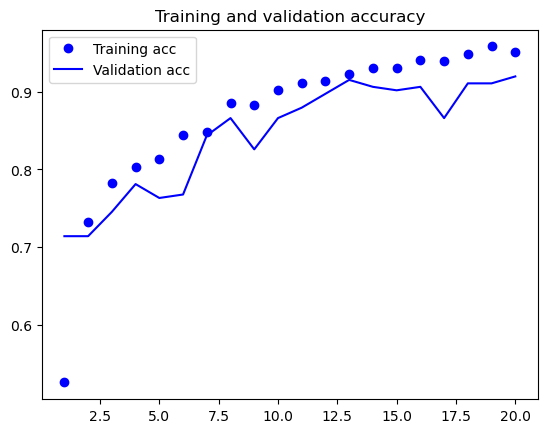

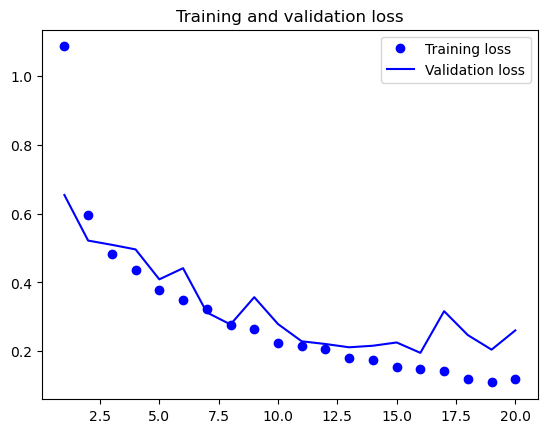

<Figure size 640x480 with 0 Axes>

In [21]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')  
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'F:\machine learning\lab 2\model_Accuracy.png')

Found 200 images belonging to 4 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step


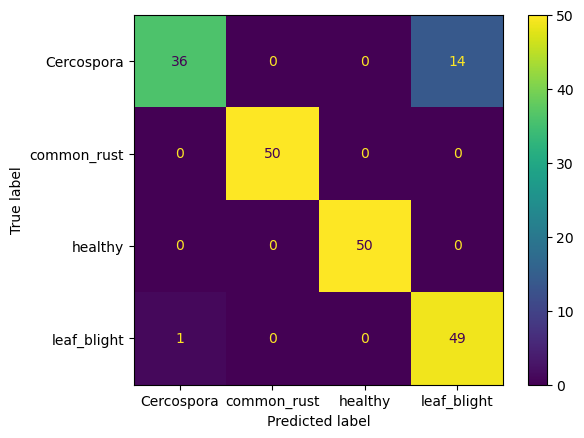

In [33]:
model = load_model(r'F:\machine learning\lab 2\dataset Lab\lab13\E1-cp-0013-loss0.21.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [35]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.97      0.72      0.83        50
 common_rust       1.00      1.00      1.00        50
     healthy       1.00      1.00      1.00        50
 leaf_blight       0.78      0.98      0.87        50

    accuracy                           0.93       200
   macro avg       0.94      0.92      0.92       200
weighted avg       0.94      0.93      0.92       200

